# Overview of functions from cross interactions from Laplace

Overview of python functions from `biosspheres.laplace.crossinteractions`.

In [1]:
import biosspheres.laplace.crossinteractions as cross

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import biosspheres.quadratures.sphere as quadratures
import biosspheres.miscella.auxindexes as auxindexes

## Preliminaries

### Geometry


All the python functions assume the following geometry:

$N$ disjoint spheres in $\mathbb{R}^3$:
- Position vectors of the sphere centers: $\mathbf{p_j} \in \mathbb{R}^3$, with $j \in \{1,...,N\}$.  
- Radii: $\tilde{r}_j\in \mathbb{R}^+$, with $j \in \{1,...,N\}$.
- Interior of sphere $j$: $\Omega_j:=\{ \mathbf{x} \in \mathbb{R}^3:||\mathbf{x}-\mathbf{p_j}||_2<\tilde{r}_j \}$.
- Boundary of sphere $j$: $\Gamma_j:=\partial \Omega_j$.
- Exterior medium, $\Omega_0$: defined as $\mathbb{R}^3$ without the spheres and their boundaries.


### Free space fundamental solution for the Laplace equation

The free space fundamental solution of the Laplace equation, which satisfies the radiation condition is:
$$g\left(\mathbf{r},\mathbf{r'}\right):= \frac{1}{4\pi ||\mathbf{r}-\mathbf{r}'||_2}, \quad \text{with }\mathbf{r}\not = \mathbf{r'}, \quad \text{and }-\Delta g \left(\mathbf{r},\mathbf{r'}\right)=\delta \left(\mathbf{r}-\mathbf{r'}\right).$$

This is the kernel of the operators which numerical approximations are python functions from this module.

### Layer operators

Single and double layer operators defined for smooth densities:
$$DL_{0j} \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  \psi\left(\mathbf{r}'\right) \nabla g\left(\mathbf{r},\mathbf{r'}\right) \cdot \widehat{\mathbf{n}}_{0j} \ dS',$$
$$SL_{0j} \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  {\psi\left(\mathbf{r}'\right) g\left(\mathbf{r},\mathbf{r'}\right) dS'},$$
$$DL_j \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  {\psi\left(\mathbf{r}'\right) \nabla g\left(\mathbf{r},\mathbf{r'}\right) \cdot \widehat{\mathbf{n}}_{j} \ dS'},$$
$$SL_j \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  {\psi\left(\mathbf{r}' \right) g\left(\mathbf{r},\mathbf{r'}\right) dS'}$$

with the gradient being taken with respect to $\mathbf{r}'$, $\widehat{\mathbf{n}}_j$ being the exterior normal vector of $\Omega_j$, and $\widehat{\mathbf{n}}_j=-\widehat{\mathbf{n}}_{0j}$.

These operators are linear and continuous in the following Sobolev spaces:
$$DL_{0j}: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^1_{loc} \left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right),$$
$$SL_{0j}: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^1_{loc}  \left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right)  , $$
$$DL_{j}: H^{\frac{1}{2}}(\Gamma_j)\rightarrow H^1_{loc} \left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right),$$
$$SL_{j}: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^1_{loc}\left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right).$$

### Boundary integral operators

For $u\in C^\infty(\overline\Omega)$, Dirichlet and Neumann traces operators are defined as 
$$\gamma_d u := u|_{\Gamma},\qquad \gamma_n u := \nabla  u|_{\Gamma} \cdot \widehat{n},$$
where $\widehat{n}$ is the exterior unit normal.

By density arguments, the definition of Dirichlet and Neumann traces operator can be extended to $u_j \in H^1_{loc}(\Omega_j)$, with $j \{0, ..., N \}$. We extend the notation as follows

$$\gamma_d^{0j} u_0 := u_0|_{\Gamma_j},$$
$$\gamma_d^{j} u_j := u_0|_{\Gamma_j},$$
$$\gamma_n^{0j} u_0 := \nabla u_0|_{\Gamma_j} \cdot \widehat{n}_{0j},$$
$$\gamma_n^{j} u_j := \nabla u_0|_{\Gamma_j}\cdot \widehat{n}_{j},$$
where $\widehat{n}_{j}$ is the exterior normal of $\Omega_j$, with $j\in \{ 1, ..., N\}$ and $\widehat{n}_{0j}=-\widehat{n}_{j}$.

Now, we recall the definition of the boundary integral operators:
$$\begin{align*}
	V_{i,j}^0 &:=  \frac{1}{2} \left( \gamma_d^{i} SL_{0j} + \gamma_d^{0i} SL_{0j} \right) ,
	& V_{j}&:= \frac{1}{2} \left(  \gamma_d^{0j} SL_{j} + \gamma_d^{j} SL_{j} \right) ,\\
	K_{i,j}^0&:= \frac{1}{2} \left(\gamma_d^{i} DL_{0j} + \gamma_d^{0i} DL_{0j} \right) ,
	&K_{j}&:= \frac{1}{2} \left(\gamma_d^{0j} DL_{j} + \gamma_d^{j} DL_{j} \right),\\
	K^{*0}_{i,j}&:= \frac{1}{2} \left( - \gamma_n ^{i} SL_{0j} + \gamma_n ^{0i} SL_{0j}  \right),
	 & K^{*}_{j} &:= \frac{1}{2} \left( -\gamma_n ^{0j} SL_{j}  + \gamma_n ^{j} SL_{j} \right), \\
	W_{i,j}^0 &:= -\frac{1}{2} \left( - \gamma_n^{i} DL_{0j}  + \gamma_n^{0i} DL_{0j} \right) ,
	& W_{j} &:=- \frac{1}{2} \left( -\gamma_n^{0j} DL_{j} + \gamma_n^{j} DL_{j} \right).
\end{align*}$$

These operators are linear and continuous in the following Sobolev spaces: 
$$\begin{align*}
	V_{{i},j}^0 &: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_i),
	&V_{j}&: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_j),\\
	W_{{i},j}^0&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_i),
	&W_{j}&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_j) ,\\
	K_{{i},j}^0&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_i),
	&K_{j}&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_j) ,\\
	K^{*0}_{{i},j}&: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_i),
	&K^*_{j}&: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_j).
\end{align*}$$

Since the domains are smooth, the jump relations for the potentials across a closed boundary yield
$$\begin{align*}
	V_{{i},j}^0 &=   \gamma_d^{0{i}} SL_{0j},
	& V_{j}&=  \gamma_d^{j} SL_{j},\\
	W_{{i},j}^0 &=-  \gamma_n^{0{i}} DL_{0j},
	& W_{j} &=- \gamma_n^{j} DL_{j}, \\
	  K_{{i},j}^0&= \gamma_d^{0{i}} DL_{0j},  {i} \not=j,
	 & K^{*0}_{{i},j} &= \gamma_n ^{0{i}} SL_{0j}, {i}  \not=j,
\end{align*}$$
and
$$\begin{align*}
	K_{j,j}^0(\psi) &= \frac{1}{2}\psi +\gamma_d^{0j} {DL_{0j}(\psi)} ,
	&K_{j}(\psi) &= \frac{1}{2} \psi +\gamma_d^{j} {DL_{j}(\psi)} ,\\
	 K^{*0}_{j,j}(\psi) &= -\frac{1}{2} \psi + \gamma_n^{0j} {SL_{0j}(\psi)},
	&K^*_{j}(\psi) &= -\frac{1}{2} \psi + \gamma_n^j {SL_{j}(\psi)}.
\end{align*}$$

### Spherical coordinate system

A vector is written as $\mathbf{r}=\left(r,\varphi,\theta\right)^t$, with $r \in [0,\infty)$, $\varphi \in [0,2\pi)$ and $\theta \in [0,\pi]$, which in Cartesian coordinates is equivalent to $\mathbf{r}=r\left(\sin \theta \cos \varphi,\sin \theta \sin \varphi,\cos \theta\right)^t$. The unitary vectors of the spherical coordinate system can be written in Cartesian coordinates as
$$\begin{align*}
    &\widehat{\mathbf{e}}_r= (\sin \theta \cos \varphi , \sin \theta \sin \varphi , \cos \theta )^t, \\
    &\widehat{\mathbf{e}}_\theta=(\cos \theta \cos \varphi , \cos \theta \sin \varphi , -\sin \theta  )^t, \\
    &\widehat{\mathbf{e}}_{\varphi}=(-\sin \varphi , \cos \varphi , 0 )^t.
\end{align*}$$

Also, the gradient operator in spherical coordinates:
$$\begin{align*}
    \nabla f&=\frac{\partial f}{\partial r} \widehat{\mathbf{e}}_r+\frac{1}{r} \frac{\partial f}{\partial \theta} \widehat{\mathbf{e}}_\theta+\frac{1}{r \sin \theta} \frac{\partial f}{\partial \varphi} \widehat{\mathbf{e}}_{\varphi}
\end{align*}$$

### Associated Legendre functions

$P_l^m$ are the associated Legendre functions of degree $l$ and  order $m$ defined as:
$$P_{l}^m\left(x\right) := (-1)^m \left( 1- x^2\right)^{\frac{m}{2}} \frac{d^m}{dx^m}P_l(x),  \quad P_{l}\left(x\right) := \frac{1}{2^ll!}\frac{d^l}{dx^l}(x^2-1)^l.$$

Here, the term $(-1)^m$ is the Condon-Shortley phase factor.

### Real spherical harmonics

Real spherical harmonics of degree $l$ and order $m$ are defined using spherical coordinates:
$$\begin{align}
		 Y_{l,m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0}) \frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \cos m \varphi ,\\
		Y_{l,-m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0})\frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \sin m \varphi ,
\end{align}$$
with $l\in \mathbb{N}_0$, $m\in \mathbb{Z}$ such that $0\leq m\leq l$. If $m=0$, then $\delta_{m,0}=1$, and it is zero otherwise.

### Orthonormality of spherical harmonics

Spherical harmonics are dense in $C(\mathbb{S}^2)$, with $\mathbb{S}^2$ the surface of the unit sphere, and form a complete orthonormal system in $L^2(\mathbb{S}^2)$ with respect to the internal product defined by:
$$\left( \psi , \xi \right)_{L^2(\mathbb{S}^2)} = \int_{0}^{2\pi}\int_{0}^{\pi} \psi\left(\theta,\varphi\right) \xi\left(\theta,\varphi\right) \sin\left(\theta\right) d\theta d\varphi.$$

They also are orthogonal in $H^1(\mathbb{S}^2)$.

### Reference systems

Let be $j\in \{1,...,N\}$. We define the reference system $j$ as the one centered at $\mathbf{p_j}$ with the same orientation that the reference system centered in the origin. Furthermore, we denote by $Y_{l,m,j}$ the spherical harmonic $Y_{l,m}$ centered in the origin of the reference system $j$. Thus, if $\left( r_j, \varphi_j, \theta_j \right) $ are the vector spherical coordinates of $\mathbf{r_j}$ in the reference system $j$, we have that $Y_{l,m,j}\left(\mathbf{r}_j\right)=Y_{l,m}\left(\theta_j, \varphi_j\right)$.

### Some expansions in spherical harmonics

#### Expansion of the fundamental solution

Let $\mathbf{r}$, $\mathbf{r}'$ be vectors, whose spherical coordinates in the reference system $j$ are $\left(r_j,\theta_j, \varphi_j \right)$ and $\left(r_j',\theta_j', \varphi_j' \right)$, respectively. For $r_j>r_j'$ we have
$$g\left(\mathbf{r}, \mathbf{r}'\right) = \sum_{l=0}^{\infty}  \frac{1}{2l+1} \frac{r_j^{'l}}{r_j^{l+1}}\sum_{m=-l}^l Y_{l,m,j}\left(\mathbf{r}\right)  Y_{l,m,j}\left(\mathbf{r}'\right).$$
This series  and its term by term first derivatives with respect to $r_j$ or $r_j'$ are absolutely and uniformly convergent on compact subsets with $r_j>r_j'$.

#### Results for layer potentials

Let be $j\in \{1,\ldots,N\}$, and $\tilde{r}_j$ the radius of $\Omega_j$.
- Let $\mathbf{r} \in \Omega_0$ and $\mathbf{r}=(r,\theta,\varphi )$ be expressed in the $j$th spherical coordinate system, then
$$\begin{align*}
    DL_{0j} ( Y_{l,m,j}) (\mathbf{r}) &= -\frac{l}{2l+1} \left( \frac{\tilde{r}_j}{r} \right)^{l+1} Y_{l,m}(\theta, \varphi ),\\
    SL_{0j} ( Y_{l,m,j}) (\mathbf{r}) &= \frac{\tilde{r}_j}{2l+1} \left( \frac{\tilde{r}_j}{r} \right)^{l+1} Y_{l,m}(\theta, \varphi ).
\end{align*}$$
- Let $\mathbf{r} \in \Omega_j$ and $\mathbf{r}=(r,\theta,\varphi )$ expressed in the $j$th spherical coordinate system, then
$$\begin{align*}
    DL_{j} ( Y_{l,m,j}) (\mathbf{r}) &= -\frac{l+1}{2l+1} \left( \frac{r}{\tilde{r}_j} \right)^{l} Y_{l,m}(\theta, \varphi ),\\
    SL_{j} ( Y_{l,m,j}) (\mathbf{r}) &= \frac{\tilde{r}_j}{2l+1} \left( \frac{r}{\tilde{r}_j} \right)^{l} Y_{l,m}(\theta, \varphi ).
\end{align*}$$

#### Results for operators of Cross-interactions

The following holds
$$\begin{align*}
\left( V_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= \left( V_{j,i}^0\left( Y_{p,q,i} \right) ; Y_{l,m,j} \right)_{L^2(\Gamma_j)},\\
\left( K_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= - \frac{l}{\tilde{r}_j} \left( V_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)}, \\
\left( K_{j,i}^{*0}\left( Y_{p,q,i} \right) ; Y_{l,m,j} \right)_{L^2(\Gamma_j)} &= \left( K_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)}, \\
\left( W_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= \frac{l}{\tilde{r}_j} \left( K_{i,j}^{*0}\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} .
\end{align*}$$
It can be deduced that the integrals of all the cross-interactions of a couple of spheres $i$ and $j$ can be derived having the results of the expression $\left( V_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)}$ for all of the $l$, $m$, $p$ and $q$ needed, which avoids the need of computing numerically the other integral expressions.

## Comments on the numerical algorithms implemented

Cross-interaction operators, e.g.~$V_{i,j}^0$ for  $i \not = j$, are non-singular, but are non diagonalizable. The double and single layer operators analytic expressions are used in the numerical computation of the boundary integral operators: 
$$\begin{align}
	\left( V_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= \int_{\Gamma_i} SL_{0j}(Y_{l,m,j}) Y_{p,q,i} \ d \Gamma_i ,\\
	\left( K_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= \int_{\Gamma_i} DL_{0j}(Y_{l,m,j}) Y_{p,q,i}  \ d \Gamma_i,\\
	\left( K^{*0}_{i,j}\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= \int_{\Gamma_i}  \widehat{\mathbf{n}}_{0i} \cdot\nabla SL_{0j}(Y_{l,m,j})  Y_{p,q,i} \ d \Gamma_i,\\
	\left( W_{i,j}^0\left( Y_{l,m,j} \right)  ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= - \int_{\Gamma_i}   \widehat{\mathbf{n}}_{0i}\cdot \nabla DL_{0j}(Y_{l,m,j}) Y_{p,q,i} \ d \Gamma_i .
\end{align}$$

Approximations of this integrals are provided via Gauss-Legendre quadratures. Specifically, along $\theta$, we use the change of variable $u=cos(\theta)$. Then, variable functions are sampled at the zeros of the Legendre Polynomial of degree $L_c+1$, whereas the trapezoidal rule is applied to equally spaced nodes in $\varphi$, with $2L_c+1$ points. If the function being integrated has a spherical harmonic expansion with coefficients equal to zero for degrees higher than $L_c$, then the quadrature yields the exact result, assuming that there are not other sources of error. Moreover, the integral in the variable $\varphi$ can be computed using the Fast Fourier Transform.

## `v_0_sj_semi_analytic_v1d`

This function returns a numpy array of two dimensions, which we will call `data_v`. The entries of the array are
$$data_v[p(2p + 1) + q, l(2l + 1) + m] = ( V_{s,j}^0 Y_{l,m,j} , Y_{p,q,s} )_{L^2(\mathcal{S}_s)}.$$
with Laplace kernel.

The `1d` on the name of the routine indicates the type of input it needs. See the following sections for details.

### Docstring

In [3]:
print(cross.v_0_sj_semi_analytic_v1d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator V_{s,j}^0 with
    Laplace kernel evaluated and tested with real spherical harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of one dimension.
    It is a SLOW routine, because it does not have performance
    improvements for the real spherical harmonic transform algorithm.

    Notes
    -----
    data_v[p(2p + 1) + q, l(2l + 1) + m] =
        ( V_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    The expression V_{s,j}^0 Y_{l,m,j} is analytic. A quadrature scheme
    is used to compute the surface integral corresponding to the inner
    product.

    Parameters
    ----------
    big_l : int
        >= 0, max degree of spherical harmonics used.
    r_j : float
        > 0, radius of the sphere j.
   

### Example

Definition of the parameters:

Radii:

In [4]:
radio_1 = 3.
radio_2 = 2.
rs = np.asarray([radio_1, radio_2])

Center positions of the spheres:

In [5]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [6]:
big_l = 18
big_l_c = 25

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature, this differs from the routines without the `1d` in its name:

In [7]:
final_length, pre_vector_t, transform = quadratures.real_spherical_harmonic_transform_1d(big_l, big_l_c)

In [8]:
r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf = quadratures.from_sphere_s_cartesian_to_j_spherical_1d(
    radio_2, p_1, p_2, final_length, pre_vector_t)
r_coord_2tf, phi_coord_2tf, cos_theta_coord_2tf = quadratures.from_sphere_s_cartesian_to_j_spherical_1d(
    radio_1, p_2, p_1, final_length, pre_vector_t)

Now, we can obtain the arrays for the $V_{2,1}^0$ and $V_{1,2}^0$ operators (notice how their inputs are different depending on the subindexes):

In [9]:
data_v21 = cross.v_0_sj_semi_analytic_v1d(
    big_l, radio_1, radio_2, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)
data_v12 = cross.v_0_sj_semi_analytic_v1d(
    big_l, radio_2, radio_1, r_coord_2tf, phi_coord_2tf,
    cos_theta_coord_2tf, final_length, transform)

One of the properties of the cross-interactions given in the preliminaries results in `data_v21 = data_v12`$^t$. As this a numerical approximation, we will not have the equality.

The absolute error obtained is good:

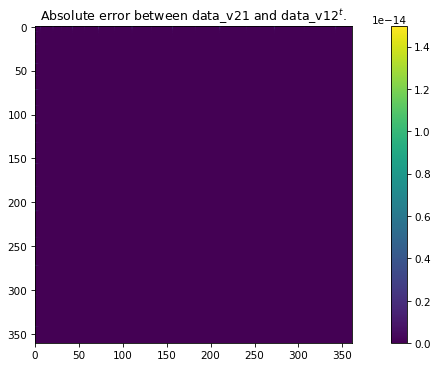

In [10]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_v12 - data_v21.T)
plt.imshow(im)
plt.colorbar()
plt.title('Absolute error between data_v21 and data_v12$^t$.')
plt.show()

However, the relative error of each entry is not good for all values, specially when the entries are near to zero:

C:\Users\there\AppData\Local\Temp\ipykernel_7616\2109776671.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))


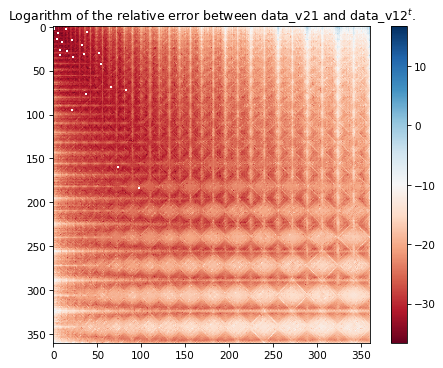

In [11]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_v12 - data_v21.T) / np.abs(data_v12)
plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))
plt.colorbar()
plt.title('Logarithm of the relative error between data_v21 and data_v12$^t$.')
plt.show()

The checking of this property could be useful, specially when the relative error increases for some entries when using higher degrees of spherical harmonics.

## `v_0_sj_semi_analytic_v2d`

This function returns a numpy array of two dimensions, which we will call `data_v`. The entries of the array are
$$data_v[p(2p + 1) + q, l(2l + 1) + m] = ( V_{s,j}^0 Y_{l,m,j} , Y_{p,q,s} )_{L^2(\mathcal{S}_s)}.$$

It is the same than `v_0_sj_semi_analytic_v1d`, but with different inputs. For bigger computations this one is faster.

See the following section for details.

### Docstring

In [12]:
print(cross.v_0_sj_semi_analytic_v2d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator V_{s,j}^0 with
    Laplace kernel evaluated and tested with real spherical harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of two dimensions, given by the function
    from_sphere_s_cartesian_to_j_spherical_2d of the module
    biosspheres.quadratures.spheres.

    Notes
    -----
    data_v[p(2p + 1) + q, l(2l + 1) + m] =
        ( V_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    The expression V_{s,j}^0 Y_{l,m,j} is analytic. A quadrature scheme
    is used to compute the surface integral corresponding to the inner
    product.

    It uses functions from the package pyshtools to compute the
    spherical harmonic transforms. These functions have performance
    improvements.

    Parameters
  

### Example

Definition of parameters:

Radii:

In [13]:
radio_1 = 3.
radio_2 = 2.

Center positions of the spheres:

In [14]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [15]:
big_l = 10
big_l_c = 25

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature. This differs from the routines without the `2d` in its name:

In [16]:
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = \
    quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d = (
        quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
            radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
            pre_vector_t_2d))
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)

Now, we can obtain the array for the $V_{2,1}^0$ operator:

In [17]:
data_v21_2d = cross.v_0_sj_semi_analytic_v2d(
    big_l, radio_1, radio_2, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

We can compare the result with the one given by `v_0_sj_semi_analytic_v1d`:

In [18]:
final_length, pre_vector_t, transform = \
    quadratures.real_spherical_harmonic_transform_1d(big_l, big_l_c)
r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf = (
    quadratures.from_sphere_s_cartesian_to_j_spherical_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))
data_v21 = cross.v_0_sj_semi_analytic_v1d(
    big_l, radio_1, radio_2, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)

Relative error:

C:\Users\there\AppData\Local\Temp\ipykernel_7616\761239704.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))


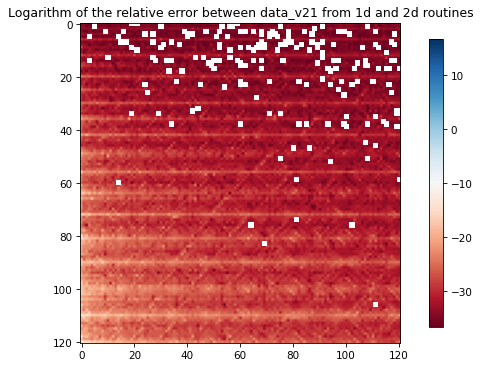

In [19]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_v21_2d - data_v21) / np.abs(data_v21)
plt.imshow(np.log(im), cmap='RdBu', norm=colors.CenteredNorm(vcenter=-10))
plt.colorbar(shrink=0.9)
plt.title('Logarithm of the relative error between data_v21 from 1d and 2d routines')
plt.show()

## `v_0_js_from_v_0_sj`

This function returns a numpy array of two dimensions, which we will call `data_vjs`. The entries of the array are
$$data_vjs[p(2p+1) + q, l(2l+1) + m] = ( V_{j,s}^0 Y_{l,m,s} ; Y_{p,q,j} )_{L^2(\mathcal{S}_s)}.$$

For obtaining the array corresponding to the operator $V^0_{j,s}$ the input needed is the array corresponding to the operator $V^0_{s,j}$. This functions uses the property of the arrays `data_v21 = data_v12`$^t$, showed in the example of `v_0_sj_semi_analytic_v1d`.

### Docstring

In [20]:
print(cross.v_0_js_from_v_0_sj.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator V_{j,s}^0 with
    Laplace kernel evaluated and tested with real spherical harmonics.
    This routine needs the numpy array corresponding to V_{s,j}^0
    (notice the change of the order of the indexes indicating the
    spheres).

    Notes
    -----
    data_v_js[p*(2p+1) + q, l*(2l+1) + m] =
        ( V_{j,s}^0 Y_{l,m,s} ; Y_{p,q,j} )_{L^2(S_j)}.
    Y_{l,m,s} : spherical harmonic degree l, order m, in the coordinate
        system s.
    S_j : surface of the sphere j.

    This computation uses the following result for this specific case:
    ( V_{j,s}^0 Y_{l,m,s} ; Y_{p,q,j} )_{L^2(S_j)}.
        = ( V_{s,j}^0 Y_{p,q,j} ; Y_{l,m,s} )_{L^2(S_s)}

    Parameters
    ----------
    data_v_sj: np.ndarray
        of floats. Represents a numerical approximation of the matrix
        formed by the boundary integral operator V_{s,j}^0 with Laplace
        kernel

### Example

Definition of the parameters:

Radii:

In [21]:
radio_1 = 3.
radio_2 = 2.

Center positions of the spheres:

In [22]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Maximum degree of spherical harmonics used, and parameter for the quadrature rules:

In [23]:
big_l = 3
big_l_c = 25

We use one of the previous routines to compute the array `data_v12_2d`:

In [24]:
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
r_coord_2tf_2d, phi_coord_2tf_2d, cos_theta_coord_2tf_2d = \
    (quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
        radio_1, p_2, p_1, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)
data_v12_2d = cross.v_0_sj_semi_analytic_v2d(
    big_l, radio_2, radio_1, r_coord_2tf_2d, phi_coord_2tf_2d,
    cos_theta_coord_2tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

And we use that as input to compute the array `data_v21`:

In [25]:
data_v21 = cross.v_0_js_from_v_0_sj(data_v12_2d)

We can compare the given result with the version computed by one of the previous routines:

In [26]:
r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d = (
    quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
        radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
data_v21_2d = cross.v_0_sj_semi_analytic_v2d(
    big_l, radio_1, radio_2, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

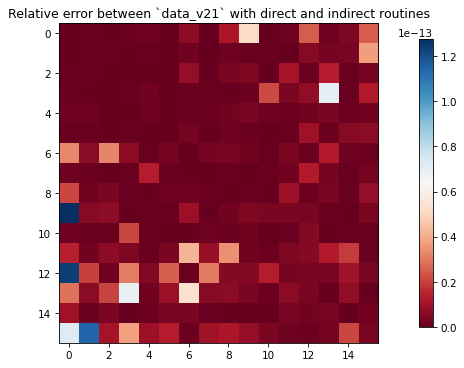

In [27]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_v21_2d - data_v21) / np.abs(data_v21)
plt.imshow(im, cmap='RdBu')
plt.colorbar(shrink = 0.9)
plt.title('Relative error between `data_v21` with direct and indirect '
          'routines')
plt.show()

## `k_0_sj_semi_analytic_v1d`

This function returns a numpy array of two dimensions, which we will call `data_k`. The entries of the array are
$$data_k[p(2p + 1) + q, l(2l + 1) + m] = ( K_{s,j}^0 Y_{l,m,j} , Y_{p,q,s} )_{L^2(\mathcal{S}_s)}.$$

The `1d` on the name of the routine references the type of input it needs. See the following sections for details.

### Docstring

In [28]:
print(cross.k_0_sj_semi_analytic_v1d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator K_{s,j}^0 with
    Laplace kernel evaluated and tested with real spherical harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of one dimension.
    It is a SLOW routine, because it does not use any symmetry or
    properties of the spherical harmonics.

    Notes
    -----
    data_k[p*(2p+1) + q, l*(2l+1) + m] =
        ( K_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    The expression K_{s,j}^0 Y_l,m,j can be obtained analytically. A
    quadrature scheme is used to compute the surface integral
    corresponding to the inner product.

    Parameters
    ----------
    big_l : int
        >= 0, max degree.
    r_j : float
        > 0, radius of the sphere j.
    r_s : float
        > 0, radius of th

### Example

Definition of the parameters:

Radii:

In [29]:
radio_1 = 1.2
radio_2 = 3.

Positions of the center of the spheres:

In [30]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [31]:
big_l = 2
big_l_c = 25

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature, this differs from the routines without the `1d` in its name:

In [32]:
final_length, pre_vector_t, transform = \
    quadratures.real_spherical_harmonic_transform_1d(big_l, big_l_c)

In [33]:
r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf = (
    quadratures.from_sphere_s_cartesian_to_j_spherical_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))

We compute the array `data_k21`:

In [34]:
data_k21 = cross.k_0_sj_semi_analytic_v1d(
    big_l, radio_1, radio_2, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)

To check its relationship with the $V^0_{2,1}$ operator, showed in the preliminaries:

In [35]:
data_v21 = cross.v_0_sj_semi_analytic_v1d(
    big_l, radio_1, radio_2, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)

In [36]:
eles = np.arange(0, big_l + 1)
el_diagonal_array = np.diag(np.repeat(eles / -radio_1, 2 * eles + 1))

In [37]:
aux = data_v21 @ el_diagonal_array

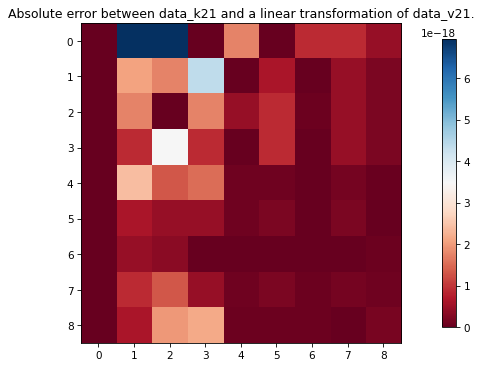

In [38]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_k21 - aux)
plt.imshow(im, cmap='RdBu')
plt.colorbar(shrink=0.9)
plt.title('Absolute error between data_k21 and'
          ' a linear transformation of data_v21.')
plt.show()

## `k_0_sj_semi_analytic_v2d`

This function returns a numpy array of two dimensions, which we will call `data_k`. The entries of the array are
$$data_k[p(2p + 1) + q, l(2l + 1) + m] = ( K_{s,j}^0 Y_{l,m,j} , Y_{p,q,s} )_{L^2(\mathcal{S}_s)}.$$

It is the same than `k_0_sj_semi_analytic_v1d`, but with different inputs. For bigger computations this one is faster.

### Docstring

In [39]:
print(cross.k_0_sj_semi_analytic_v2d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator K_{s,j}^0 with
    Laplace kernel evaluated and tested with real spherical harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of two dimensions, given by the function
    from_sphere_s_cartesian_to_j_spherical_2d of the module
    biosspheres.quadratures.spheres.

    Notes
    -----
    data_k[p(2p + 1) + q, l(2l + 1) + m] =
        ( K_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    The expression K_{s,j}^0 Y_l,m,j can be obtained analytically.
    A quadrature scheme is used to compute the other surface integral.
    It uses functions from the package pyshtools to compute the
    spherical harmonic transforms.

    Parameters
    ----------
    big_l : int
        >= 0, max degree of spherical har

### Example

Definition of parameters:

Radii:

In [40]:
radio_1 = 3.
radio_2 = 2.

Position of the center of the spheres:

In [41]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [42]:
big_l = 3
big_l_c = 25

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature. This differs from the routines without the `2d` in its name:

In [43]:
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = \
    quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d = \
    (quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
        radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)

We obtain the array data_k21:

In [44]:
data_k21_2d = cross.k_0_sj_semi_analytic_v2d(
    big_l, radio_1, radio_2, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

The result can be compared to the one computed by the previous routine:

In [45]:
final_length, pre_vector_t, transform = quadratures.real_spherical_harmonic_transform_1d(big_l, big_l_c)
r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))
data_k21 = cross.k_0_sj_semi_analytic_v1d(
    big_l, radio_1, radio_2, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)

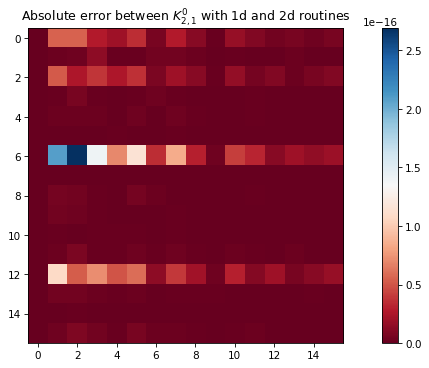

In [46]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_k21_2d - data_k21)
plt.imshow(im, cmap='RdBu')
plt.colorbar()
plt.title('Absolute error between $K_{2,1}^0$ with 1d and 2d routines')
plt.show()

## `k_0_sj_from_v_0_sj`

This functions uses the relationship between the operators $K^0_{s,j}$ and $V^0_{s,j}$ to compute `data_k` from `data_v`. See docstring for details.

### Docstring

In [47]:
print(cross.k_0_sj_from_v_0_sj.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator K_{s,j}^0 with
    Laplace kernel evaluated and tested with real spherical harmonics.
    This routine needs the numpy array corresponding to the testing of
    V_{s,j}^0.

    Notes
    -----
    data_k[p*(2p+1) + q, l*(2l+1) + m] =
        ( K_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    This computation uses the following result for this specific case:
    K_{s,j}^0 Y_{l,m} = - l / r_j V_{s,j}^0 Y_{l,m}.

    Parameters
    ----------
    data_v : np.ndarray
        that represents a numerical approximation of the matrix formed
        by the boundary integral operator V_{s,j}^0 with Laplace kernel
        evaluated and tested with spherical harmonics.
    r_j : float
        > 0, radius of the sphere j.
    el_diagonal : scipy.sp

### Example

Definition of the parameters:

Radii:

In [48]:
radio_1 = 1.3
radio_2 = 1.7

Positions of the center of the spheres:

In [49]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Maximum degree of spherical harmonics used, and parameter for the quadrature rules:

In [50]:
big_l = 3
big_l_c = 25

We use one of the previous routine to calculate `data_21_2d`, which will be the input for computing `data_k21`

In [51]:
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = \
    quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d = (
    quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
        radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)
data_v21_2d = cross.v_0_sj_semi_analytic_v2d(
    big_l, radio_1, radio_2, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

In [52]:
el_diagonal = auxindexes.diagonal_l_sparse(big_l)
data_k21 = cross.k_0_sj_from_v_0_sj(
    data_v21_2d, radio_1, el_diagonal)

To compare

In [53]:
data_k21_2d = cross.k_0_sj_semi_analytic_v2d(
    big_l, radio_1, radio_2, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

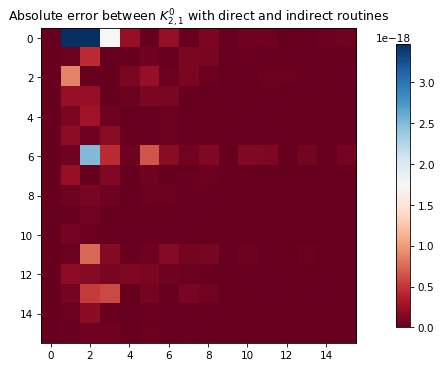

In [54]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_k21_2d - data_k21)
plt.imshow(im, cmap='RdBu')
plt.colorbar(shrink=0.9)
plt.title('Absolute error between $K_{2,1}^0$ with direct and indirect '
          'routines')
plt.show()

## `ka_0_sj_semi_analytic_recurrence_v1d`

The `1d` on the name of the routine references the type of input it needs. See the following sections for details.

### Docstring

In [55]:
print(cross.ka_0_sj_semi_analytic_recurrence_v1d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator K_{s,j}^{*0}
    with Laplace kernel evaluated and tested with real spherical
    harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of one dimension.
    It is a SLOW routine, because it does not use any symmetry or
    properties of the spherical harmonics.

    Notes
    -----
    data_ka[p*(2p+1) + q, l*(2l+1) + m] =
        ( K_{s,j}^{*0} Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    The expression K_{s,j}^{*0} Y_l,m,j can be obtained analytically.
    A quadrature scheme is used to compute the other surface integral
    corresponding to the inner product.
    For computing the derivative in theta a recurrence formula for
    Legendre Functions is used.

    In this routine the quadrature points NEED 

### Example

Definition of the parameters:

Radii:

In [56]:
radio_1 = 3.
radio_2 = 2.

Positions of the center of the spheres:

In [57]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [58]:
big_l = 5
big_l_c = 25

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature, this differs from the routines without the `1d` in its name:

In [59]:
final_length, pre_vector_t, transform = \
    quadratures.real_spherical_harmonic_transform_1d(big_l, big_l_c)
(r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf,
 er_1tf, eth_1tf, ephi_1tf) = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))

Calling of the function:

In [60]:
data_ka21 = cross.ka_0_sj_semi_analytic_recurrence_v1d(
    big_l, radio_1, radio_2, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, er_1tf, eth_1tf, ephi_1tf, final_length,
    transform)

## `ka_0_sj_semi_analytic_recurrence_v2d`

### Docstring

In [61]:
print(cross.ka_0_sj_semi_analytic_recurrence_v2d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator K_{s,j}^{*0}
    with Laplace kernel evaluated and tested with real spherical
    harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of two dimensions, given by the function
    from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_2d of
    the module biosspheres.quadratures.spheres.

    Notes
    -----
    data_ka[p*(2p+1) + q, l*(2l+1) + m] =
        ( K_{s,j}^{*0} Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    The expression K_{s,j}^{*0} Y_l,m,j can be obtained analytically.
    A quadrature scheme is used to compute the other surface integral
    corresponding to the inner product.
    For computing the derivative in theta a recurrence formula for
    Legendre Functions is used.

    In this ro

### Example

Definition of the parameters:

Radii:

In [62]:
radio_1 = 3.
radio_2 = 2.

Positions of the center of the spheres:

In [63]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [64]:
big_l = 5
big_l_c = 25

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature. This differs from the routines without the `2d` in its name:

In [65]:
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = \
    quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
(r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d,
 er_1tf_2d, eth_1tf_2d, ephi_1tf_2d) = (
    quadratures.from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_2d(
        radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)

Calling of the function:

In [66]:
data_ka21_2d = cross.ka_0_sj_semi_analytic_recurrence_v2d(
    big_l, radio_1, radio_2, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, er_1tf_2d, eth_1tf_2d, ephi_1tf_2d, weights,
    pre_vector_t_2d[2, :, 0], quantity_theta_points, quantity_phi_points,
    pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q)

If we compare with the previous routine:

In [67]:
final_length, pre_vector_t, transform = \
    quadratures.real_spherical_harmonic_transform_1d(big_l, big_l_c)
(r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf,
 er_1tf, eth_1tf, ephi_1tf) = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))
data_ka21 = cross.ka_0_sj_semi_analytic_recurrence_v1d(
    big_l, radio_1, radio_2, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, er_1tf, eth_1tf, ephi_1tf, final_length,
    transform)

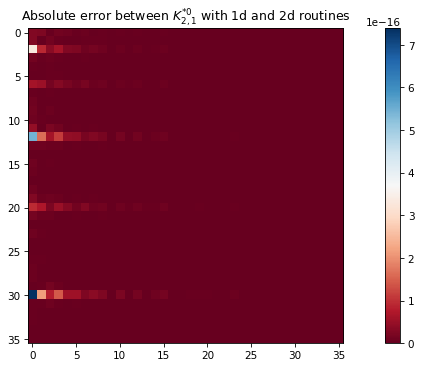

In [68]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_ka21_2d - data_ka21)
plt.imshow(im, cmap='RdBu')
plt.colorbar()
plt.title('Absolute error between $K_{2,1}^{*0}$ with 1d and 2d routines')
plt.show()

## `ka_0_sj_from_k_js`

### Docstring

In [69]:
print(cross.ka_0_sj_from_k_js.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator K_{s,j}^{*0}
    with Laplace kernel evaluated and tested with real spherical
    harmonics.
    This routine needs the numpy array corresponding to K_{j,s}^0
    (notice the change of the order of the indexes indicating the
    spheres).

    Notes
    -----
    data_ka_sj[p*(2p+1) + q, l*(2l+1) + m] =
        ( K_{s,j}^{*0} Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    This computation uses the following result for this specific case:
    ( K_{s,j}^{*0} Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}
        = ( K_{j,s}^0 Y_p,q,s ; Y_l,m,j )_{L^2(S_j)}.

    Parameters
    ----------
    data_kjs : numpy array.
        represents a numerical approximation of the matrix formed by the
        boundary integral operator V_{s,j}^0 with Laplace kernel
      

### Example

Definition of parameters:

Radii:

In [70]:
radio_1 = 3.
radio_2 = 2.

Position of the center of the spheres:

In [71]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [72]:
big_l = 3
big_l_c = 25

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature. This differs from the routines without the `2d` in its name:

In [73]:
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = \
    quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
r_coord_2tf_2d, phi_coord_2tf_2d, cos_theta_coord_2tf_2d = \
    (quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
        radio_1, p_2, p_1, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)

In [74]:
data_k12_2d = cross.k_0_sj_semi_analytic_v2d(
    big_l, radio_2, radio_1, r_coord_2tf_2d, phi_coord_2tf_2d,
    cos_theta_coord_2tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

Calling of the function:

In [75]:
data_ka21 = cross.ka_0_sj_from_k_js(data_k12_2d)

To compare

In [76]:
(r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d,
 er_1tf_2d, eth_1tf_2d, ephi_1tf_2d) = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_2d(
        radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
data_ka21_2d = cross.ka_0_sj_semi_analytic_recurrence_v2d(
    big_l, radio_1, radio_2, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, er_1tf_2d, eth_1tf_2d, ephi_1tf_2d, weights,
    pre_vector_t_2d[2, :, 0], quantity_theta_points, quantity_phi_points,
    pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q)

Text(0.5, 1.0, 'Absolute error between $K_{2,1}^{*0}$ from $K_{2,1}^{0}$')

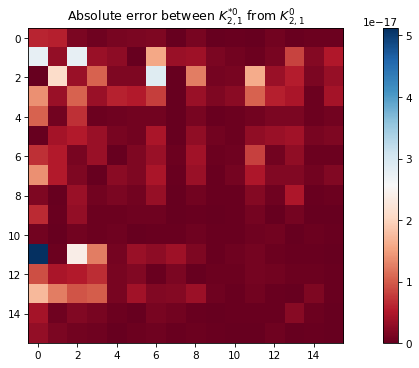

In [77]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_ka21_2d - data_ka21)
plt.imshow(im, cmap='RdBu')
plt.colorbar()
plt.title('Absolute error between $K_{2,1}^{*0}$ from $K_{2,1}^{0}$')

## `ka_0_sj_from_v_sj`

### Docstring

In [78]:
print(cross.ka_0_sj_from_v_sj.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator K_{s,j}^{*0} with
    Laplace kernel evaluated and tested with real spherical harmonics.
    This routine needs the numpy array corresponding to V_{s,j}^0.

    Notes
    -----
    data_ka[p*(2p+1) + q, l*(2l+1) + m] =
        ( K_{s,j}^{*0} Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    This computation uses the following result for this specific case:
    ( K_{s,j}^{*0} Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}
        = -rac{p}{r_j} ( V_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}

    Parameters
    ----------
    data_v_sj : np.ndarray
        represents a numerical approximation of the matrix formed by the
        boundary integral operator V_{s,j}^0 with Laplace kernel evaluated and
        tested with spherical harmonics.
    r_s : float
     

### Example

Definition of parameters:

Radii:

In [79]:
radio_1 = 3.
radio_2 = 2.

Position of the center of the spheres:

In [80]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [81]:
big_l = 3
big_l_c = 25

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature. This differs from the routines without the `2d` in its name:

In [82]:
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = \
        quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d = \
    (quadratures.from_sphere_s_cartesian_to_j_spherical_2d(
        radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)
data_v21_2d = cross.v_0_sj_semi_analytic_v2d(
    big_l, radio_1, radio_2, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q)

In [83]:
el_diagonal = auxindexes.diagonal_l_sparse(big_l)

Calling of the function:

In [84]:
data_ka21 = cross.ka_0_sj_from_v_sj(data_v21_2d, radio_2, el_diagonal)

To compare

In [85]:
(r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d,
 er_1tf_2d, eth_1tf_2d, ephi_1tf_2d) = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_2d(
        radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
data_ka21_2d = cross.ka_0_sj_semi_analytic_recurrence_v2d(
    big_l, radio_1, radio_2, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, er_1tf_2d, eth_1tf_2d, ephi_1tf_2d, weights,
    pre_vector_t_2d[2, :, 0], quantity_theta_points, quantity_phi_points,
    pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q)

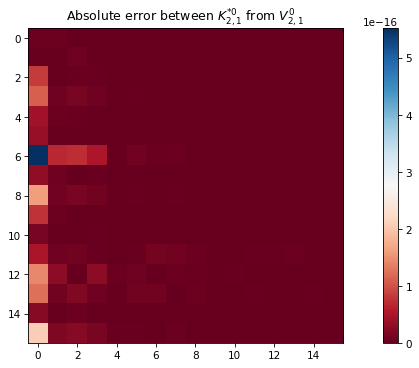

In [86]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_ka21_2d - data_ka21)
plt.imshow(im, cmap='RdBu')
plt.colorbar()
plt.title('Absolute error between $K_{2,1}^{*0}$ from $V_{2,1}^{0}$')
plt.show()

## `w_0_sj_from_v_sj`

### Docstring

In [87]:
print(cross.w_0_sj_from_v_sj.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator W_{s,j}^0 with
    Laplace kernel evaluated and tested with real spherical harmonics.
    This routine needs the numpy array corresponding to V_{s,j}^0.

    Notes
    -----
    data_w[p*(2p+1) + q, l*(2l+1) + m] =
        ( W_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}.
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    This computation uses the following result for this specific case:
    ( W_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}
        = -rac{l p}{r_j r_s}
          * ( V_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}

    Parameters
    ----------
    data_v_sj : np.ndarray
        represents a numerical approximation of the matrix formed by the
        boundary integral operator V_{s,j}^0 with Laplace kernel
        evaluated and
        tested with spherical harmonics.
    r

### Example

Definition of parameters:

Radii:

In [88]:
radio_1 = 3.
radio_2 = 2.

Position of the center of the spheres:

In [89]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

Maximum degree of spherical harmonics used, and parameter for the quadrature rule:

In [90]:
big_l = 3
big_l_c = 25

Auxiliary parameters that use the ones previously defined, which are related to the implemented quadrature. This differs from the routines without the `1d` in its name:

In [91]:
final_length, pre_vector_t, transform = \
    quadratures.real_spherical_harmonic_transform_1d(big_l, big_l_c)
(r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf, er_times_n_1tf,
 etheta_times_n_1tf, ephi_times_n_1tf) = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))

In [92]:
data_v21 = cross.v_0_sj_semi_analytic_v1d(
    big_l, radio_1, radio_2, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)

In [93]:
el_diagonal = auxindexes.diagonal_l_sparse(big_l)

Calling of the function:

In [94]:
data_w21 = cross.w_0_sj_from_v_sj(data_v21, radio_1, radio_2, el_diagonal)

We check if `data_w21 = data_w_12`:

In [95]:
(r_coord_2tf, phi_coord_2tf, cos_theta_coord_2tf, er_times_n_2tf,
 etheta_times_n_2tf, ephi_times_n_2tf) = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_and_spherical_vectors_1d(
        radio_1, p_2, p_1, final_length, pre_vector_t))

In [96]:
data_v12 = cross.v_0_sj_semi_analytic_v1d(
    big_l, radio_2, radio_1, r_coord_2tf, phi_coord_2tf,
    cos_theta_coord_2tf, final_length, transform)

In [97]:
data_w12 = cross.w_0_sj_from_v_sj(data_v12, radio_2, radio_1, el_diagonal)

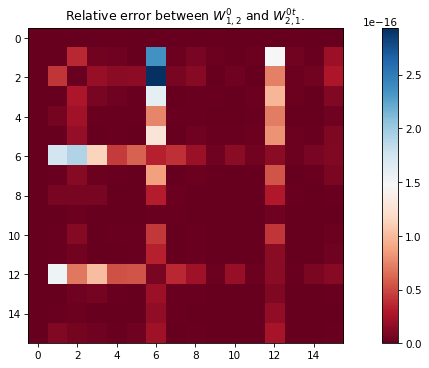

In [98]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_w12 - np.transpose(data_w21))
plt.imshow(im, cmap='RdBu')
plt.colorbar()
plt.title('Relative error between $W_{1,2}^0$ and $W_{2,1}^{0t}$.')
plt.show()

## `a_0_sj_and_js_v1d`

The `1d` on the name of the routines references the type of input it needs. See the following sections for details.

### Docstring

In [99]:
print(cross.a_0_sj_and_js_v1d.__doc__)


    Returns two numpy arrays that represents a numerical approximation
    of two matrices formed by the following boundary integral operators:
    a_sj = [-K_{s,j}^0 , V_{s,j}^0 ]
           [ W_{s,j}^0 , K_{s,j}^{*0}]
    a_js = [-K_{j,s}^0 , V_{j,s}^0 ]
           [ W_{j,s}^0 , K_{j,s}^{*0}]
    with Laplace kernel evaluated and tested with real spherical
    harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of one dimension.
    It is a SLOW routine, because it does not use any symmetry or
    properties of the spherical harmonics.

    Notes
    -----
    The only operator computed directly with the numerical quadrature is
    V_{s,j}^0, which follows the same steps as v_0_sj_semi_analytic_v1d.
    The others are computed with the same properties used in:
    v_0_js_from_v_0_sj
    k_0_sj_from_v_0_sj
    ka_0_sj_from_v_sj
    w_0_sj_from_v_sj

    Parameters
    ----------
    big_l : int
        >= 0, max degree.
    r_j : float
        > 0,

### Example

In [100]:
radio_1 = 3.
radio_2 = 2.

p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

big_l = 3
big_l_c = 50

In [101]:
final_length, pre_vector_t, transform = quadratures.real_spherical_harmonic_transform_1d(big_l, big_l_c)
r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))

In [102]:
diagonal = auxindexes.diagonal_l_dense(big_l)

In [103]:
a_21, a_12 = cross.a_0_sj_and_js_v1d(
    big_l, radio_1, radio_2, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform, diagonal)

To compare

In [104]:
data_v21 = cross.v_0_sj_semi_analytic_v1d(
    big_l, radio_1, radio_2, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)
data_k21 = cross.k_0_sj_semi_analytic_v1d(
    big_l, radio_1, radio_2, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)
el_diagonal = auxindexes.diagonal_l_sparse(big_l)
data_ka21 = cross.ka_0_sj_from_v_sj(data_v21, radio_2, el_diagonal)
data_w21 = cross.w_0_sj_from_v_sj(data_v21, radio_1, radio_2, el_diagonal)

In [105]:
a_21_prev = np.concatenate((
    np.concatenate((-data_k21, data_v21), axis=1),
    np.concatenate((data_w21, data_ka21), axis=1)),
    axis=0)

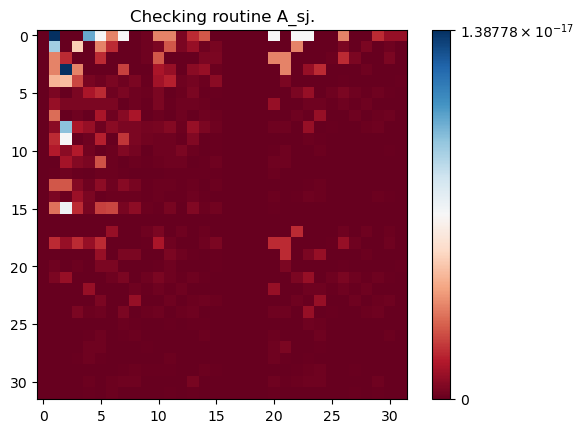

In [106]:
aux = np.abs(a_21 - a_21_prev)
plt.figure()
plt.imshow(aux, cmap='RdBu',
           norm=colors.SymLogNorm(linthresh=10**(-8)))
plt.colorbar()
plt.title('Checking routine A_sj.')
plt.show()

## `a_0_sj_and_js_v2d`

### Docstring

In [107]:
print(cross.a_0_sj_and_js_v2d.__doc__)


    Returns two numpy arrays that represents a numerical approximation
    of two matrices formed by the following boundary integral operators:
    a_sj = [-K_{s,j}^0 , V_{s,j}^0 ]
           [ W_{s,j}^0 , K_{s,j}^{*0}]
    a_js = [-K_{j,s}^0 , V_{j,s}^0 ]
           [ W_{j,s}^0 , K_{j,s}^{*0}]
    with Laplace kernel evaluated and tested with real spherical
    harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of two dimensions, given by the function
    from_sphere_s_cartesian_to_j_spherical_2d
    of the module biosspheres.quadratures.spheres.

    Notes
    -----
    The only operator computed directly with the numerical quadrature is
    V_{s,j}^0, which follows the same steps as v_0_sj_semi_analytic_v2d.
    The others are computed with the same properties used in:
    v_0_js_from_v_0_sj
    k_0_sj_from_v_0_sj
    ka_0_sj_from_v_sj
    w_0_sj_from_v_sj

    Parameters
    ----------
    big_l : int
        >= 0, max degree of spherical harmo

### Example

In [108]:
radio_1 = 3.
radio_2 = 2.

p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

big_l = 3
big_l_c = 50

In [109]:
quantity_theta_points, quantity_phi_points, weights, pre_vector_t_2d = \
    quadratures.gauss_legendre_trapezoidal_2d(big_l_c)
r_coord_1tf_2d, phi_coord_1tf_2d, cos_theta_coord_1tf_2d = \
    (quadratures.
     from_sphere_s_cartesian_to_j_spherical_2d(
        radio_2, p_1, p_2, quantity_theta_points, quantity_phi_points,
        pre_vector_t_2d))
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = auxindexes.pes_y_kus(big_l)

In [110]:
diagonal = auxindexes.diagonal_l_dense(big_l)

In [111]:
a_21_2d, a_12_2d = cross.a_0_sj_and_js_v2d(
    big_l, radio_1, radio_2, r_coord_1tf_2d, phi_coord_1tf_2d,
    cos_theta_coord_1tf_2d, weights, pre_vector_t_2d[2, :, 0],
    quantity_theta_points, quantity_phi_points, pesykus, p2_plus_p_plus_q,
    p2_plus_p_minus_q, diagonal)

To compare

In [112]:
final_length, pre_vector_t, transform = \
    quadratures.real_spherical_harmonic_transform_1d(big_l, big_l_c)
r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))

In [113]:
a_21, a_12 = cross.a_0_sj_and_js_v1d(
    big_l, radio_1, radio_2, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform, diagonal)

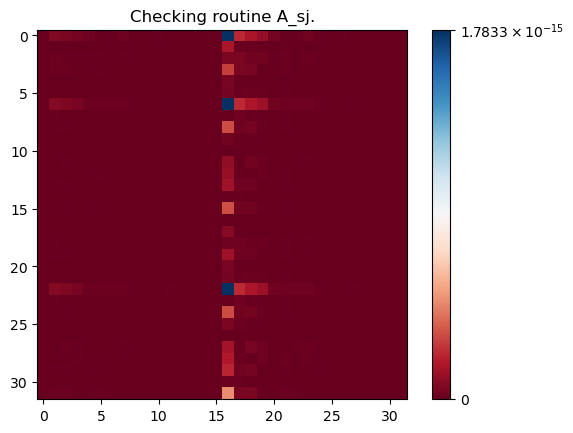

In [114]:
aux = np.abs(a_21 - a_21_2d)
plt.figure()
plt.imshow(aux, cmap='RdBu',
           norm=colors.SymLogNorm(linthresh=10**(-8)))
plt.colorbar()
plt.title('Checking routine A_sj.')
plt.show()

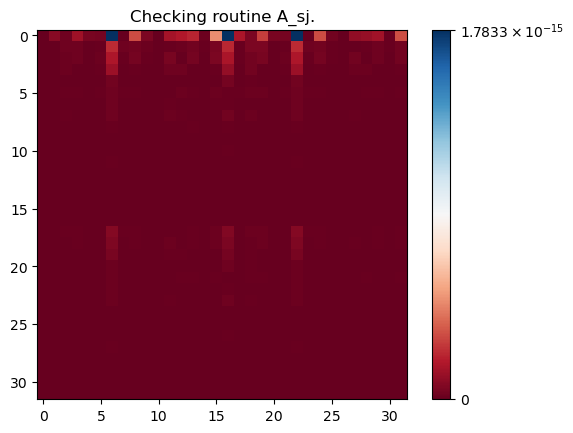

In [115]:
aux = np.abs(a_12 - a_12_2d)
plt.figure()
plt.imshow(aux, cmap='RdBu',
           norm=colors.SymLogNorm(linthresh=10**(-8)))
plt.colorbar()
plt.title('Checking routine A_sj.')
plt.show()

## `all_cross_interactions_n_spheres_v1d`

The `1d` on the name of the routine references the type of input it needs. See the following sections for details.

### Docstring

In [116]:
print(cross.all_cross_interactions_n_spheres_v1d.__doc__)


    Returns an array with all the cross interactions for the given n
    spheres.
    It is a SLOW routine.

    Notes
    -----
    Uses the following:
    quadratures.real_spherical_harmonic_transform_1d(big_l, big_l_c)
    auxindexes.diagonal_l_dense(big_l)
    quadratures.from_sphere_s_cartesian_to_j_spherical_1d
    a_0_sj_and_js_v1d

    Parameters
    ----------
    n : int
        >= 2. Number of spheres.
    big_l : int
        >= 0, max degree.
    big_l_c : int
        >= 0. It's the parameter used to compute the points of the
        quadrature.
    radii : np.ndarray
        Array with the radii of the spheres.
    center_positions :
        List or arrays with the center position of the spheres

    Returns
    -------
    almost_big_a_0 : np.ndarray
        Shape ( 2 * n * (big_l + 1) ** 2, 2 * n * (big_l + 1) ** 2).

    See Also
    --------
    all_cross_interactions_n_spheres_v2d

    


### Example

In [117]:
radio_1 = 3.
radio_2 = 2.
rs = np.asarray([radio_1, radio_2])

p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

big_l = 3
big_l_c = 50

n = 2
p = [p_1, p_2]

In [118]:
cross_1 = cross.all_cross_interactions_n_spheres_v1d(
    n, big_l, big_l_c, rs, p)

## `all_cross_interactions_n_spheres_v2d`

### Docstring

In [119]:
print(cross.all_cross_interactions_n_spheres_v2d.__doc__)


    Returns an array with all the cross interactions for the given n
    spheres.

    Notes
    -----
    Uses the following:
    auxindexes.pes_y_kus
    quadratures.quadrature_points_sphere_shtools_version_2d
    auxindexes.diagonal_l_dense
    quadratures.from_sphere_s_cartesian_to_j_spherical_2d
    a_0_sj_and_js_v2d

    Parameters
    ----------
    n : int
        >= 2. Number of spheres.
    big_l : int
        >= 0, max degree.
    big_l_c : int
        >= 0. It's the parameter used to compute the points of the
        quadrature.
    radii : np.ndarray
        Array with the radii of the spheres.
    center_positions : array_like
        List or array with the center position of the spheres

    Returns
    -------
    almost_big_a_0 : np.ndarray
        Shape ( 2 * n * (big_l + 1) ** 2, 2 * n * (big_l + 1) ** 2).

    See Also
    --------
    all_cross_interactions_n_spheres_v1d

    


### Example 

In [120]:
radio_1 = 3.
radio_2 = 2.
rs = np.asarray([radio_1, radio_2])

p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

big_l = 3
big_l_c = 50

n = 2
p = [p_1, p_2]

In [121]:
cross_2 = cross.all_cross_interactions_n_spheres_v2d(
    n, big_l, big_l_c, rs, p)

To compare

In [122]:
cross_1 = cross.all_cross_interactions_n_spheres_v1d(
    n, big_l, big_l_c, rs, p)

In [123]:
print(np.linalg.norm(cross_2 - cross_1))

3.575151838646758e-15
